# Barilla Exhibit 12 #



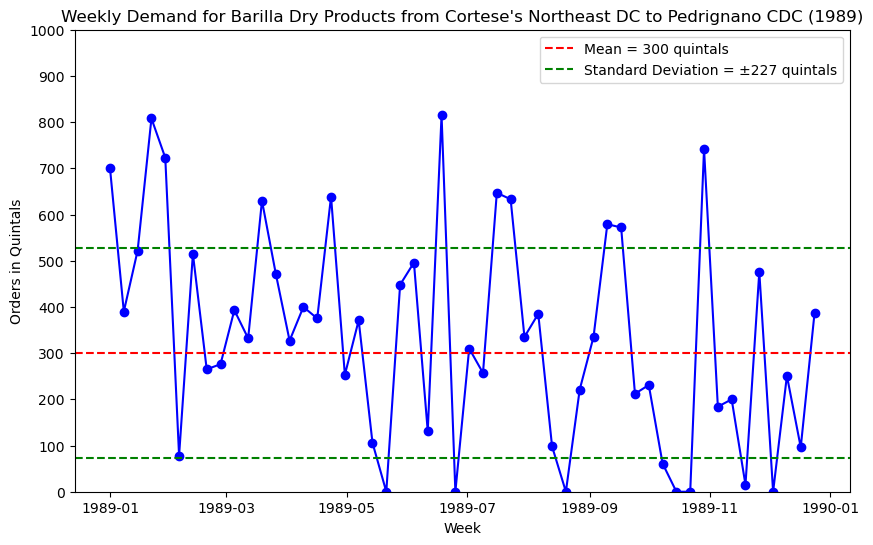

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample weekly demand data
np.random.seed(0)
weeks = pd.date_range(start='1989-01-01', periods=52, freq='W')
mean_demand = 300
std_dev_demand = 227

demand_data = np.random.normal(mean_demand, std_dev_demand, 52).astype(int)
demand_data = np.clip(demand_data, 0, None)  # Ensure no negative demand values

# Create a DataFrame
demand_df = pd.DataFrame({'Week': weeks, 'Demand': demand_data})

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(demand_df['Week'], demand_df['Demand'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title("Weekly Demand for Barilla Dry Products from Cortese's Northeast DC to Pedrignano CDC (1989)")
plt.xlabel("Week")
plt.ylabel("Orders in Quintals")
plt.ylim(0, 1000)
plt.yticks(np.arange(0, 1100, 100))

# Add mean and standard deviation lines
plt.axhline(y=mean_demand, color='r', linestyle='--', label=f'Mean = {mean_demand} quintals')
plt.axhline(y=mean_demand + std_dev_demand, color='g', linestyle='--', label=f'Standard Deviation = ±{std_dev_demand} quintals')
plt.axhline(y=mean_demand - std_dev_demand, color='g', linestyle='--')

# Add legend
plt.legend()

# Display the plot
plt.show()


# Exhibit 13 # 


Inventory Summary:
         Product_A   Product_B   Product_C  Product_D
count   52.000000   52.000000   52.000000  52.000000
mean   199.692308  149.807692  100.250000  50.057692
std     13.251028   10.107342   10.052558   5.413902
min    168.000000  129.000000   83.000000  38.000000
25%    189.500000  143.750000   94.000000  46.000000
50%    199.000000  149.000000   98.000000  50.500000
75%    209.000000  157.250000  106.000000  53.000000
max    230.000000  172.000000  131.000000  62.000000

ABC Categories:
 Product_A    A
Product_B    A
Product_C    B
Product_D    C
dtype: object

Reorder Points:
 Product_A    430.305258
Product_B    323.200387
Product_C    223.957165
Product_D    112.748466
dtype: float64


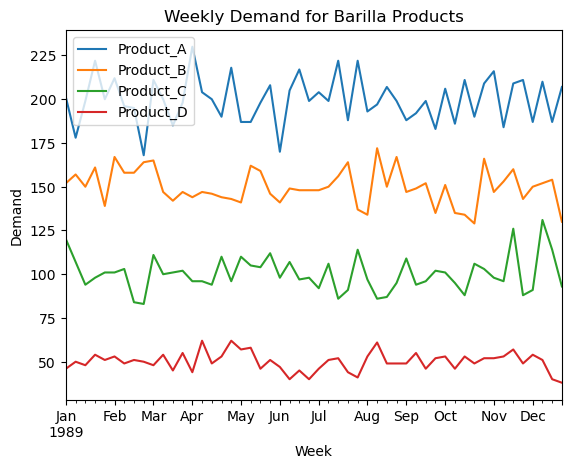

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for Exhibit 12: Weekly demand for Barilla dry products
data = {
    'Week': pd.date_range(start='1989-01-01', periods=52, freq='W'),
    'Product_A': np.random.poisson(200, 52),
    'Product_B': np.random.poisson(150, 52),
    'Product_C': np.random.poisson(100, 52),
    'Product_D': np.random.poisson(50, 52)
}
demand_df = pd.DataFrame(data)

# Sample data for Exhibit 13: Sample stockout and inventory levels
stockout_data = {
    'Week': pd.date_range(start='1989-01-01', periods=52, freq='W'),
    'Product_A_Stockout': np.random.binomial(1, 0.1, 52),
    'Product_B_Stockout': np.random.binomial(1, 0.15, 52),
    'Product_C_Stockout': np.random.binomial(1, 0.2, 52),
    'Product_D_Stockout': np.random.binomial(1, 0.25, 52)
}
stockout_df = pd.DataFrame(stockout_data)

# Inventory Analysis
def inventory_analysis(df):
    summary = df.describe()
    return summary

# ABC Analysis
def abc_analysis(df):
    total_demand = df.drop(columns=['Week']).sum().sort_values(ascending=False)
    total_demand_cumsum = total_demand.cumsum() / total_demand.sum()
    
    abc_categories = total_demand_cumsum.apply(
        lambda x: 'A' if x <= 0.8 else ('B' if x <= 0.95 else 'C')
    )
    
    return abc_categories

# Calculate Reorder Points
def calculate_reorder_points(demand_df, stockout_df, lead_time=2, service_level=0.95):
    mean_demand = demand_df.drop(columns=['Week']).mean()
    std_demand = demand_df.drop(columns=['Week']).std()
    
    # Z-score for desired service level
    z_score = 1.65  # 95% service level
    
    reorder_points = mean_demand * lead_time + z_score * std_demand * np.sqrt(lead_time)
    
    return reorder_points

# Perform analyses
inventory_summary = inventory_analysis(demand_df)
abc_categories = abc_analysis(demand_df)
reorder_points = calculate_reorder_points(demand_df, stockout_df)

# Output results
print("Inventory Summary:\n", inventory_summary)
print("\nABC Categories:\n", abc_categories)
print("\nReorder Points:\n", reorder_points)

# Visualize Demand Patterns
demand_df.set_index('Week').plot(title='Weekly Demand for Barilla Products')
plt.xlabel('Week')
plt.ylabel('Demand')
plt.show()


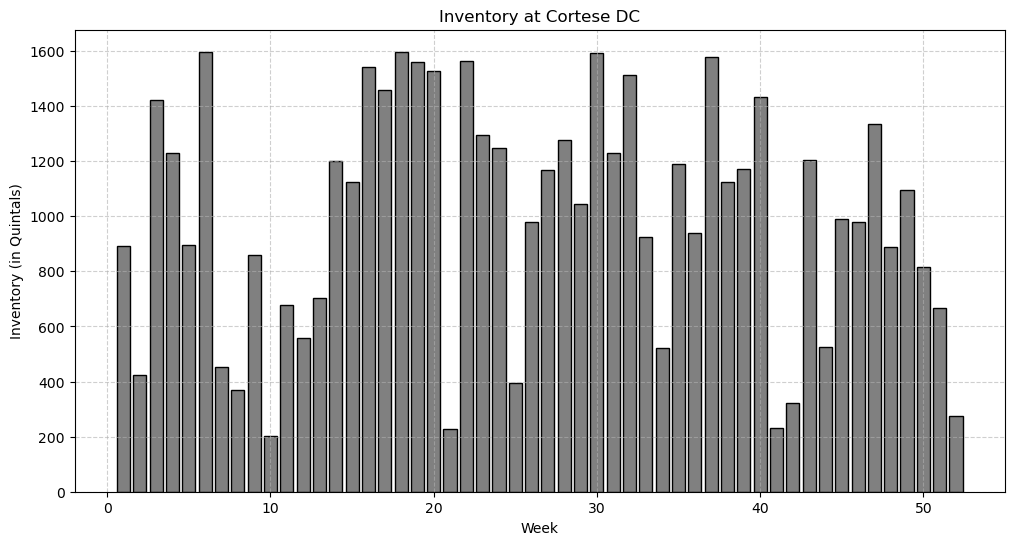

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
weeks = np.arange(1, 53)  # Weeks from 1 to 52
inventory = np.random.randint(200, 1600, size=len(weeks))  # Random inventory data for 52 weeks

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(weeks, inventory, width=0.8, color='grey', edgecolor='black')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Inventory (in Quintals)')
plt.title('Inventory at Cortese DC')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



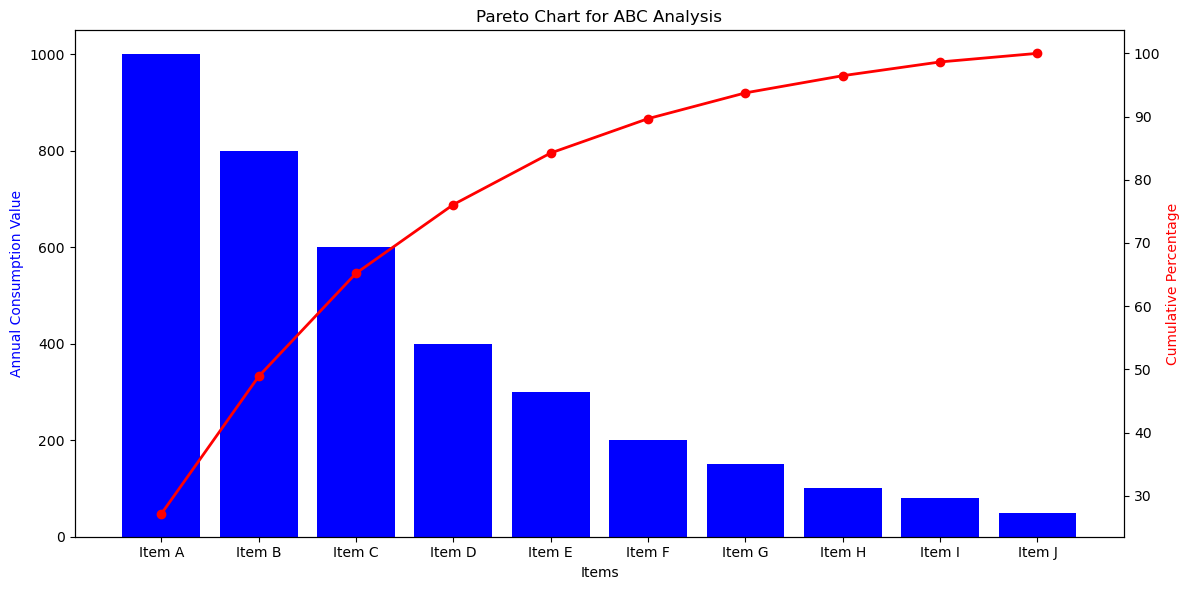

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for ABC analysis
items = ['Item A', 'Item B', 'Item C', 'Item D', 'Item E', 'Item F', 'Item G', 'Item H', 'Item I', 'Item J']
consumption_values = [1000, 800, 600, 400, 300, 200, 150, 100, 80, 50]

# Sort data
items = np.array(items)
consumption_values = np.array(consumption_values)
sorted_indices = np.argsort(consumption_values)[::-1]
items = items[sorted_indices]
consumption_values = consumption_values[sorted_indices]

# Calculate cumulative percentage
cumulative_percentage = np.cumsum(consumption_values) / np.sum(consumption_values) * 100

# Plotting the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(items, consumption_values, color='b')
ax1.set_xlabel('Items')
ax1.set_ylabel('Annual Consumption Value', color='b')

ax2 = ax1.twinx()
ax2.plot(items, cumulative_percentage, color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage', color='r')

plt.title('Pareto Chart for ABC Analysis')
plt.tight_layout()
plt.show()


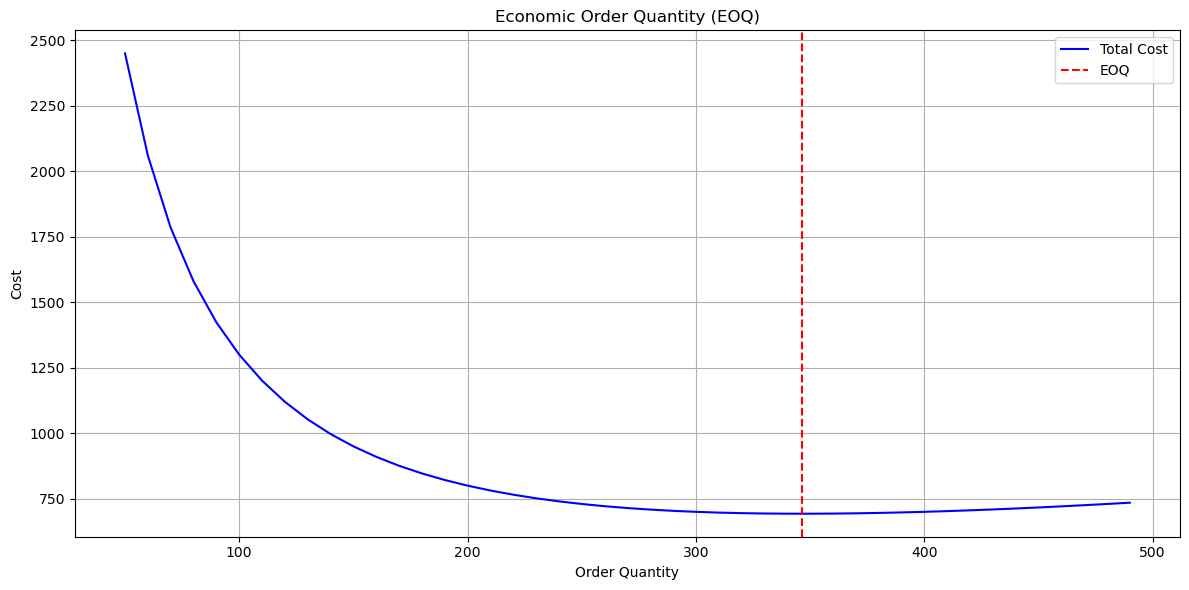

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for EOQ
order_quantities = np.arange(50, 500, 10)
demand = 1200
ordering_cost = 100
holding_cost_per_unit = 2

# Calculate costs
total_cost = (demand / order_quantities) * ordering_cost + (order_quantities / 2) * holding_cost_per_unit

# Plotting the EOQ graph
plt.figure(figsize=(12, 6))
plt.plot(order_quantities, total_cost, label='Total Cost', color='b')
plt.axvline(x=np.sqrt((2 * demand * ordering_cost) / holding_cost_per_unit), color='r', linestyle='--', label='EOQ')

# Adding labels and title
plt.xlabel('Order Quantity')
plt.ylabel('Cost')
plt.title('Economic Order Quantity (EOQ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


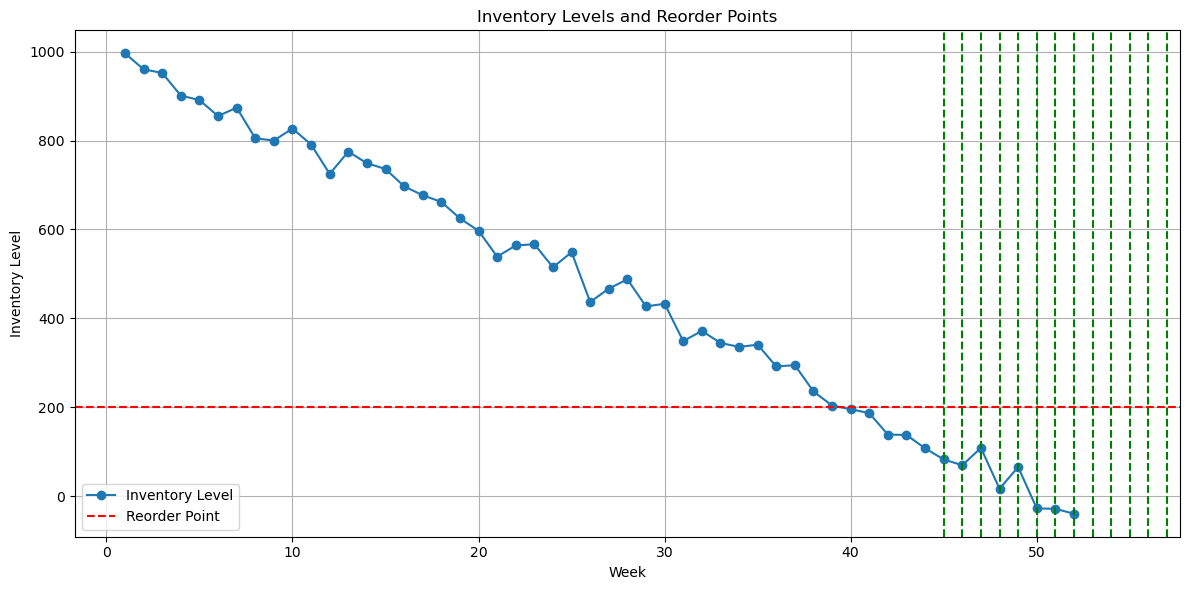

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for reorder points
weeks = np.arange(1, 53)
inventory_levels = 1000 - 20 * weeks + np.random.randint(-50, 50, size=len(weeks))
reorder_point = 200
lead_time = 5

# Plotting the reorder points graph
plt.figure(figsize=(12, 6))
plt.plot(weeks, inventory_levels, label='Inventory Level', marker='o')
plt.axhline(y=reorder_point, color='r', linestyle='--', label='Reorder Point')

# Adding lead time markers
for i in range(len(weeks)):
    if inventory_levels[i] < reorder_point:
        plt.axvline(x=weeks[i] + lead_time, color='g', linestyle='--')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Inventory Level')
plt.title('Inventory Levels and Reorder Points')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


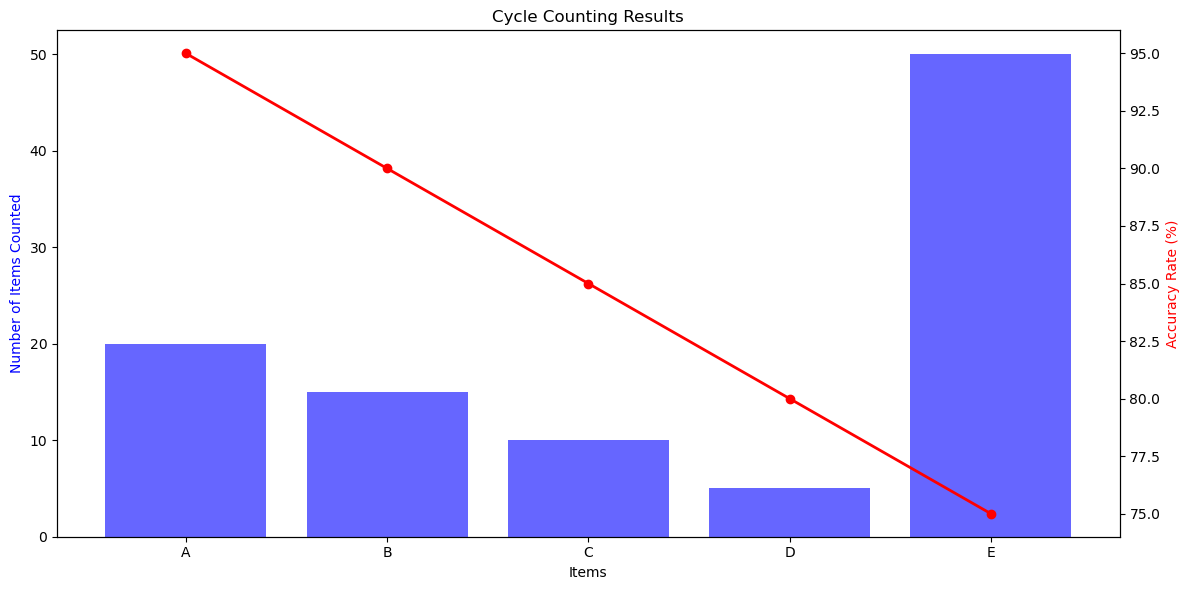

In [6]:
import matplotlib.pyplot as plt

# Example data for cycle counting
items = ['A', 'B', 'C', 'D', 'E']
counted = [20, 15, 10, 5, 50]
accuracy = [95, 90, 85, 80, 75]

# Plotting the cycle counting graph
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(items, counted, color='b', alpha=0.6)
ax1.set_xlabel('Items')
ax1.set_ylabel('Number of Items Counted', color='b')

ax2 = ax1.twinx()
ax2.plot(items, accuracy, color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Accuracy Rate (%)', color='r')

plt.title('Cycle Counting Results')
plt.tight_layout()
plt.show()


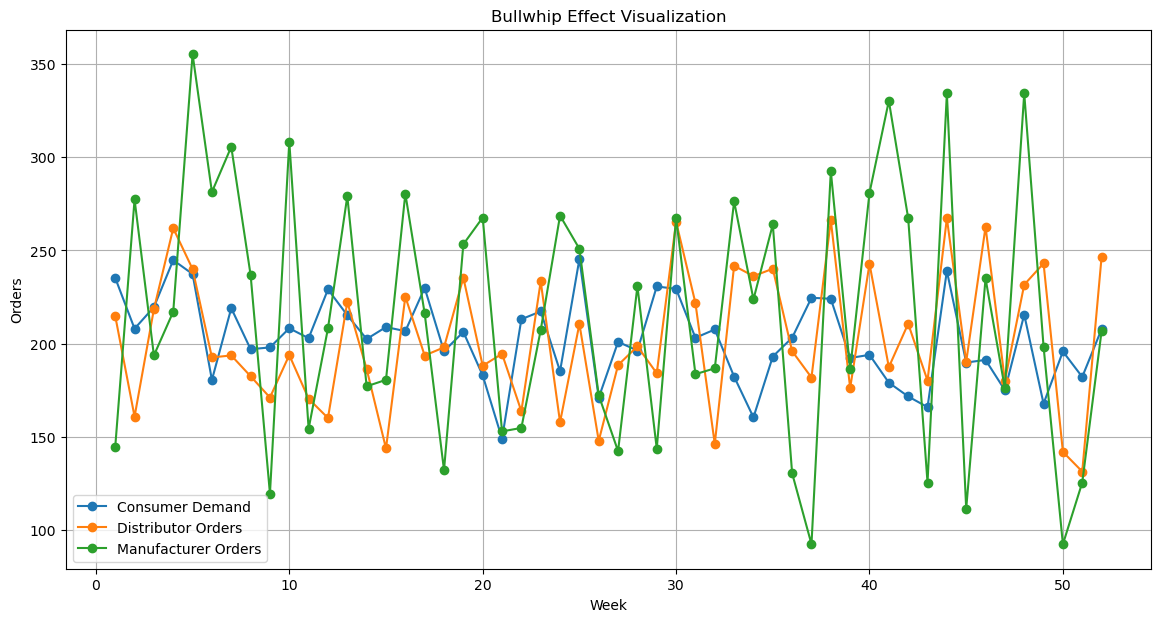

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)

# Consumer demand
weeks = np.arange(1, 53)
consumer_demand = np.random.normal(200, 20, size=len(weeks))

# Distributor orders (amplified variability)
distributor_orders = consumer_demand + np.random.normal(0, 40, size=len(weeks))

# Manufacturer orders (further amplified variability)
manufacturer_orders = distributor_orders + np.random.normal(0, 60, size=len(weeks))

# Plot the data
plt.figure(figsize=(14, 7))

plt.plot(weeks, consumer_demand, label='Consumer Demand', marker='o')
plt.plot(weeks, distributor_orders, label='Distributor Orders', marker='o')
plt.plot(weeks, manufacturer_orders, label='Manufacturer Orders', marker='o')

plt.title('Bullwhip Effect Visualization')
plt.xlabel('Week')
plt.ylabel('Orders')
plt.legend()
plt.grid(True)
plt.show()
